In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import spearmanr
import seaborn as sns

In [2]:
fits = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\fits_thesis.xlsx')
guess = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\thesis_guess.xlsx')


In [3]:
data_a = pd.concat([fits, guess], axis=1)
data = data_a.where((data_a.distance_au<=0.7) , np.nan) #(data_a.final_fit_type == "broken") & 
data_c = data_a.where((data_a.distance_au>0.7), np.nan)

In [4]:
step_ept_het_a = data_a.where((data_a.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept_a = data_a.where((data_a.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het_a = data_a.where((data_a.type_of_fit == "ept_het") & (data_a.Date >np.datetime64('2021-10-29')) , np.nan)
step_a = data_a.where((data_a.type_of_fit == "step" ) , np.nan)
ept_a = data_a.where((data_a.type_of_fit == "ept") , np.nan)


In [5]:
data.count()

Source.Name                    30
Reduced chi sq                 30
c1                             30
c1_err                         30
gamma1                         30
gamma1_err                     30
gamma2                         27
gamma2_err                     27
break_point_mev                27
break_point_err_mev            27
final_fit_type                 30
exp_cutoff_point_mev            5
cutoff_err_mev                  5
alpha                          27
year                           30
month                          30
day                            30
time                           30
fit                            30
Source.Name                    30
Date                           30
averaging                      30
Direction                      30
Data type                      30
distance_au                    30
STEP                           30
EPT                            30
HET                            30
Sigma                          30
Relative error

In [6]:
step_ept_het = data.where((data.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het") & (data.Date >np.datetime64('2021-10-29')) , np.nan)
step = data.where((data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.type_of_fit == "ept") , np.nan)


In [7]:
ept.count()

Source.Name                    9
Reduced chi sq                 9
c1                             9
c1_err                         9
gamma1                         9
gamma1_err                     9
gamma2                         7
gamma2_err                     7
break_point_mev                7
break_point_err_mev            7
final_fit_type                 9
exp_cutoff_point_mev           0
cutoff_err_mev                 0
alpha                          7
year                           9
month                          9
day                            9
time                           9
fit                            9
Source.Name                    9
Date                           9
averaging                      9
Direction                      9
Data type                      9
distance_au                    9
STEP                           9
EPT                            9
HET                            9
Sigma                          9
Relative error                 9
Fraction o

In [8]:
step_ept_het_c = data_c.where((data_c.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept_c = data_c.where((data_c.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het_c = data_c.where((data_c.type_of_fit == "ept_het") & (data_c.Date >np.datetime64('2021-10-29')) , np.nan)
step_c = data_c.where((data_c.type_of_fit == "step" ) , np.nan)
ept_c = data_c.where((data_c.type_of_fit == "ept") , np.nan)



In [9]:
n_step_ept_het = str(step_ept_het['distance_au'].count())
n_step_ept = str(step_ept['distance_au'].count())
n_ept_het = str(ept_het['distance_au'].count())
n_step = str(step['distance_au'].count())
n_ept = str(ept['distance_au'].count())


In [10]:
n_step_ept_het_a = str(step_ept_het_a['break_point_mev'].count())
n_step_ept_a = str(step_ept_a['break_point_mev'].count())
n_ept_het_a = str(ept_het_a['break_point_mev'].count())
n_step_a = str(step_a['break_point_mev'].count())
n_ept_a = str(ept_a['break_point_mev'].count())


In [11]:
n_step_ept_het_c = str(step_ept_het_c['distance_au'].count())
n_step_ept_c = str(step_ept_c['distance_au'].count())
n_ept_het_c = str(ept_het_c['distance_au'].count())
n_step_c = str(step_c['distance_au'].count())
n_ept_c = str(ept_c['distance_au'].count())

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

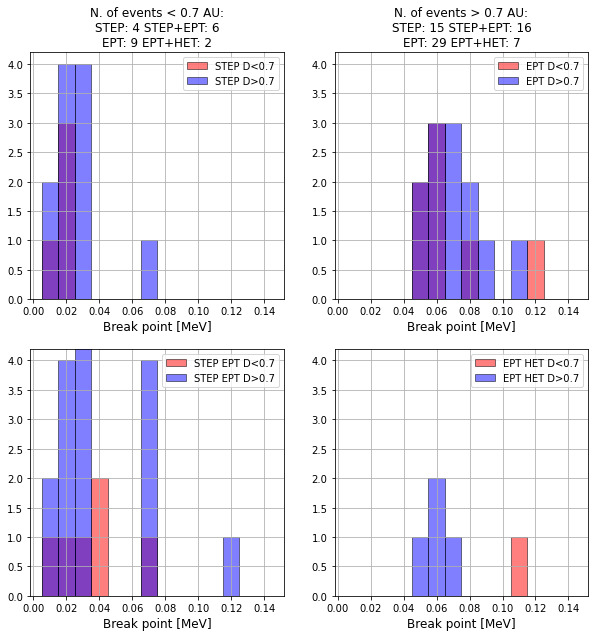

In [12]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 

b = np.arange(0,0.15,0.01)
maxlim = 4.2

ax[0,0].hist(step['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP D<0.7', alpha = 0.5)
ax[0,1].hist(ept['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'EPT D<0.7', alpha = 0.5)
ax[1,0].hist(step_ept['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP EPT D<0.7', alpha = 0.5)
ax[1,1].hist(ept_het['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'EPT HET D<0.7', alpha = 0.5)

ax[0,0].hist(step_c['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'STEP D>0.7', alpha = 0.5)
ax[0,1].hist(ept_c['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT D>0.7', alpha = 0.5)
ax[1,0].hist(step_ept_c['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'STEP EPT D>0.7', alpha = 0.5)
ax[1,1].hist(ept_het_c['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET D>0.7', alpha = 0.5)


ax[0,0].set_xlabel('Break point [MeV]', size=12)
ax[0,1].set_xlabel('Break point [MeV]', size=12)
ax[1,0].set_xlabel('Break point [MeV]', size=12)
ax[1,1].set_xlabel('Break point [MeV]', size=12)


ax[0,0].grid()
ax[0,0].legend(prop={'size': 10})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': 10})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': 10})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,maxlim)


ax[0,0].set_title('N. of events < 0.7 AU:'+'\n'+'STEP: '+ n_step+' '+'STEP+EPT: '+n_step_ept+'\n'+'EPT: '+n_ept+' '+'EPT+HET: '+n_ept_het)
ax[0,1].set_title('N. of events > 0.7 AU:'+'\n'+'STEP: '+ n_step_c+' '+'STEP+EPT: '+n_step_ept_c+'\n'+'EPT: '+n_ept_c+' '+'EPT+HET: '+n_ept_het_c)


plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)


In [13]:
sterr = []
eperr = []
eherr = []
seerr = []
for i in range(len(step)):
    sterr.append(0)
for i in range(len(step_ept)):
    seerr.append(0)
for i in range(len(ept)):
    eperr.append(0)
for i in range(len(ept_het)):
    eherr.append(0)
   

In [14]:
sterr_c = []
eperr_c = []
eherr_c = []
seerr_c = []
for i in range(len(step_c)):
    sterr_c.append(0)
for i in range(len(step_ept_c)):
    seerr_c.append(0)
for i in range(len(ept_c)):
    eperr_c.append(0)
for i in range(len(ept_het_c)):
    eherr_c.append(0)
   

In [15]:
step_ept_dis = []
step_ept_bre = []
for i in range(len(step_ept_a)):
    if np.isnan(step_ept_a['distance_au'][i]) or np.isnan(step_ept_a['break_point_mev'][i]):
        a = 10
    else:
        step_ept_dis.append(step_ept_a['distance_au'][i])
        step_ept_bre.append(step_ept_a['break_point_mev'][i])
        
step_dis = []
step_bre = []
for i in range(len(step_a)):
    if np.isnan(step_a['distance_au'][i]) or np.isnan(step_a['break_point_mev'][i]):
        a = 10
    else:
        step_dis.append(step_a['distance_au'][i])
        step_bre.append(step_a['break_point_mev'][i])
        
        
ept_dis = []
ept_bre = []
for i in range(len(ept_a)):
    if np.isnan(ept_a['distance_au'][i]) or np.isnan(ept_a['break_point_mev'][i]):
        a = 10
    else:
        ept_dis.append(ept_a['distance_au'][i])
        ept_bre.append(ept_a['break_point_mev'][i])
        
ept_het_dis = []
ept_het_bre = []
for i in range(len(ept_het_a)):
    if np.isnan(ept_het_a['distance_au'][i]) or np.isnan(ept_het_a['break_point_mev'][i]):
        a = 10
    else:
        ept_het_dis.append(ept_het_a['distance_au'][i])
        ept_het_bre.append(ept_het_a['break_point_mev'][i])

In [16]:
coeff_step_ept,p = spearmanr(step_ept_dis, step_ept_bre)
coeff_ept,p = spearmanr(ept_dis, ept_bre)
coeff_step,p = spearmanr(step_dis, step_bre)
coeff_ept_het,p = spearmanr(ept_het_dis, ept_het_bre)

In [17]:
coeff_step

0.536068329655843

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


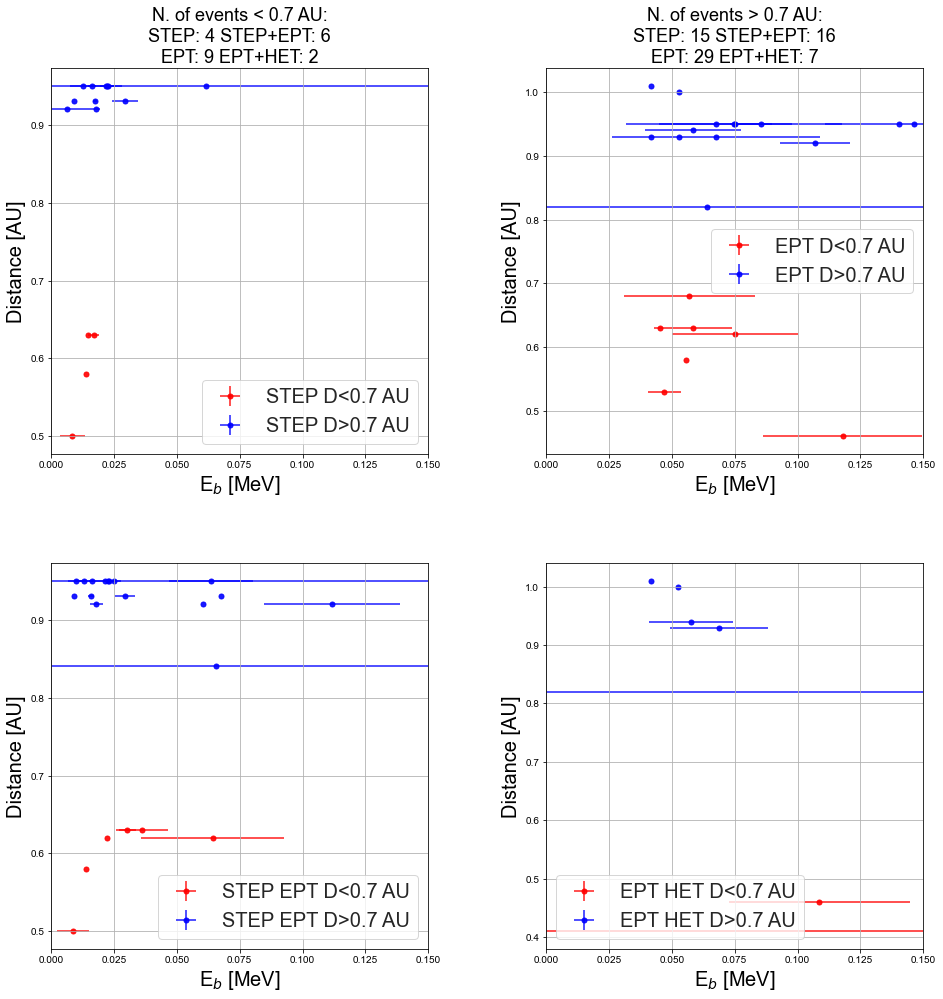

In [18]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -13

ax[0,0].errorbar(x=step['break_point_mev'], y=step['distance_au'], xerr=step['break_point_err_mev'], yerr=sterr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP D<0.7 AU' )#, label='Flux average')
ax[0,1].errorbar(x=ept['break_point_mev'], y=ept['distance_au'], xerr=ept['break_point_err_mev'], yerr=eperr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT D<0.7 AU')#, label='Flux average')
ax[1,0].errorbar(x=step_ept['break_point_mev'], y=step_ept['distance_au'], xerr=step_ept['break_point_err_mev'], yerr=seerr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT D<0.7 AU')#, label='Flux average')
ax[1,1].errorbar(x=ept_het['break_point_mev'], y=ept_het['distance_au'], xerr=ept_het['break_point_err_mev'], yerr=eherr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET D<0.7 AU')#, label='Flux average')

ax[0,0].errorbar(x=step_c['break_point_mev'], y=step_c['distance_au'], xerr=step_c['break_point_err_mev'], yerr=sterr_c, color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9, label = 'STEP D>0.7 AU')#, label='Flux average')
ax[0,1].errorbar(x=ept_c['break_point_mev'], y=ept_c['distance_au'], xerr=ept_c['break_point_err_mev'], yerr=eperr_c, color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9, label = 'EPT D>0.7 AU')#, label='Flux average')
ax[1,0].errorbar(x=step_ept_c['break_point_mev'], y=step_ept_c['distance_au'], xerr=step_ept_c['break_point_err_mev'], yerr=seerr_c, color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9, label = 'STEP EPT D>0.7 AU')#, label='Flux average')
ax[1,1].errorbar(x=ept_het_c['break_point_mev'], y=ept_het_c['distance_au'], xerr=ept_het_c['break_point_err_mev'], yerr=eherr_c, color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9, label = 'EPT HET D>0.7 AU')#, label='Flux average')


ax[0,0].set_title('N. of events < 0.7 AU:'+'\n'+'STEP: '+ n_step+' '+'STEP+EPT: '+n_step_ept+'\n'+'EPT: '+n_ept+' '+'EPT+HET: '+n_ept_het)
ax[0,1].set_title('N. of events > 0.7 AU:'+'\n'+'STEP: '+ n_step_c+' '+'STEP+EPT: '+n_step_ept_c+'\n'+'EPT: '+n_ept_c+' '+'EPT+HET: '+n_ept_het_c)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(0,xmaxlim)
#ax[0,0].set_ylim(yminlim, 0)
ax[0,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,0].set_ylabel(r'Distance [AU]', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(0,xmaxlim)
#ax[0,1].set_ylim(yminlim, 0)
ax[0,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,1].set_ylabel(r'Distance [AU]', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(0,xmaxlim)
#ax[1,0].set_ylim(yminlim, 0)
ax[1,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,0].set_ylabel(r'Distance [AU]', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(0,xmaxlim)
#ax[1,1].set_ylim(yminlim, 0)
ax[1,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,1].set_ylabel(r'Distance [AU]', size=s)



plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

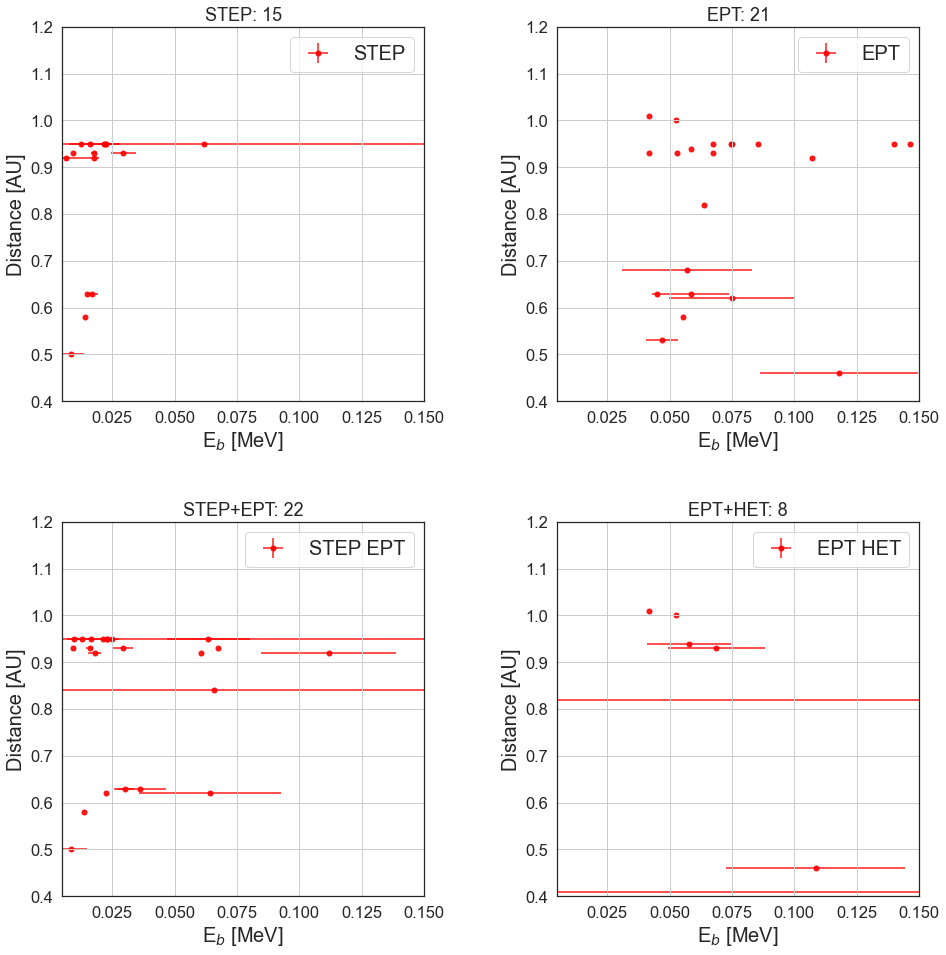

In [19]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -13
ylim = 1.2

ax[0,0].errorbar(x=step_a['break_point_mev'], y=step_a['distance_au'], xerr=step_a['break_point_err_mev'], yerr=sterr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP' )#, label='Flux average')
ax[0,1].errorbar(x=ept_a['break_point_mev'], y=ept_a['distance_au'], xerr=ept['break_point_err_mev'], yerr=eperr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept_a['break_point_mev'], y=step_ept_a['distance_au'], xerr=step_ept_a['break_point_err_mev'], yerr=seerr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het_a['break_point_mev'], y=ept_het_a['distance_au'], xerr=ept_het_a['break_point_err_mev'], yerr=eherr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('STEP: '+ n_step_a)
ax[0,1].set_title('EPT: '+n_ept_a)
ax[1,0].set_title('STEP+EPT: '+n_step_ept_a)
ax[1,1].set_title('EPT+HET: '+n_ept_het_a)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(0.005,xmaxlim)
ax[0,0].set_ylim(0.4,ylim)
ax[0,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,0].set_ylabel(r'Distance [AU]', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(0.005,xmaxlim)
ax[0,1].set_ylim(0.4,ylim)
ax[0,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[0,1].set_ylabel(r'Distance [AU]', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(0.005,xmaxlim)
ax[1,0].set_ylim(0.4,ylim)
ax[1,0].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,0].set_ylabel(r'Distance [AU]', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(0.005,xmaxlim)
ax[1,1].set_ylim(0.4,ylim)
ax[1,1].set_xlabel(r'E$_b$ [MeV]', size=s)
ax[1,1].set_ylabel(r'Distance [AU]', size=s)



plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

In [20]:
step_gammas = []
step_ept_gammas = []
ept_gammas = []
ept_het_gammas = []
step_gammas_err = []
step_ept_gammas_err = []
ept_gammas_err = []
ept_het_gammas_err = []

for i in range(len(step_a)):
    diff = step_a['gamma2'][i]-step_a['gamma1'][i]
    step_gammas.append(diff)
    err = np.sqrt(step_a['gamma2_err'][i]**2+step_a['gamma1_err'][i]**2)
    step_gammas_err.append(err)

    
for i in range(len(step_ept_a)):
    diff = step_ept_a['gamma2'][i]-step_ept_a['gamma1'][i]
    step_ept_gammas.append(diff)
    err = np.sqrt(step_ept_a['gamma2_err'][i]**2+step_ept_a['gamma1_err'][i]**2)
    step_ept_gammas_err.append(err)

for i in range(len(ept_a)):
    diff = ept_a['gamma2'][i]-ept_a['gamma1'][i]
    ept_gammas.append(diff)
    err = np.sqrt(ept_a['gamma2_err'][i]**2+ept_a['gamma1_err'][i]**2)
    ept_gammas_err.append(err)
    
for i in range(len(ept_het_a)):
    diff = ept_het_a['gamma2'][i]-ept_het_a['gamma1'][i]
    ept_het_gammas.append(diff)
    err = np.sqrt(ept_het_a['gamma2_err'][i]**2+ept_het_a['gamma1_err'][i]**2)
    ept_het_gammas_err.append(err)



In [21]:
ept_het_gammas

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 -5.477820633791,
 nan,
 -2.7207215201539166,
 nan,
 nan,
 -1.3354886037025318,
 nan,
 nan,
 nan,
 nan,
 -0.8865639841217554,
 nan,
 nan,
 nan,
 -1.3339116920580416,
 nan,
 -1.0120242966228787,
 nan,
 nan,
 nan,
 nan,
 -0.921416553712771,
 nan,
 -2.586993871005748,
 nan]

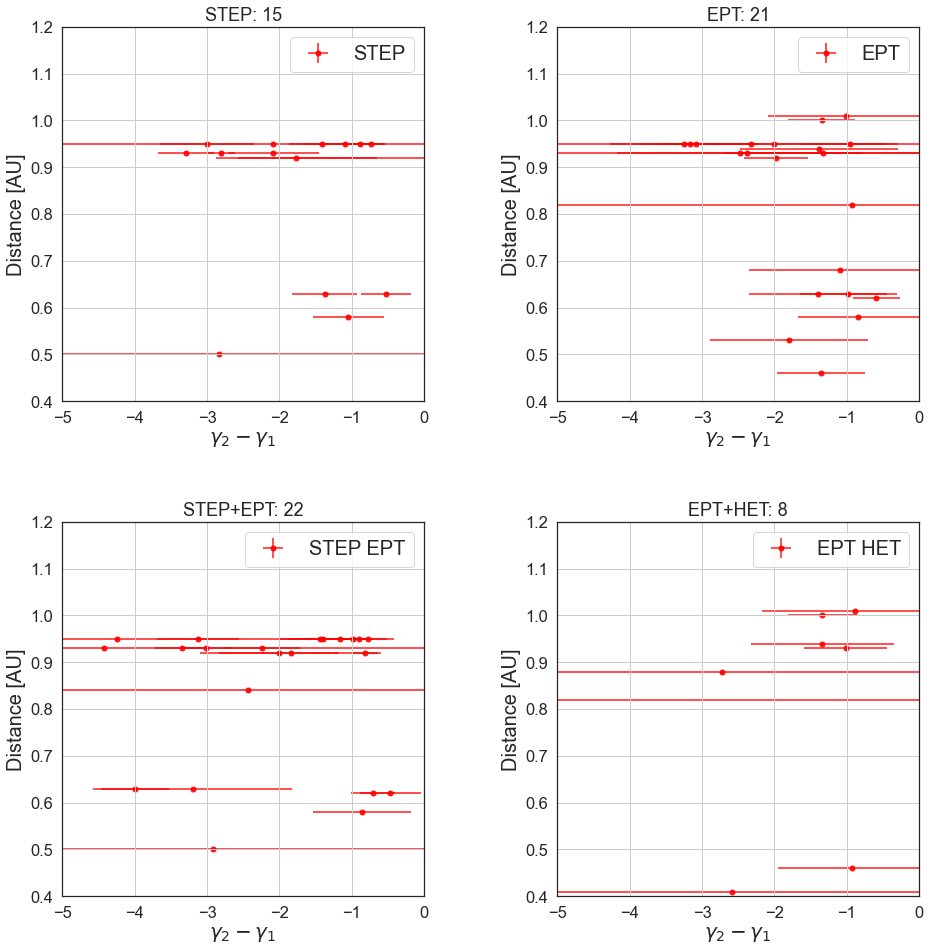

In [22]:
f, ax = plt.subplots(2,2, figsize=(15,15)) 
sns.set_theme(style="white",font_scale = 1.5)
s = 20
f.tight_layout(pad=5.0)
xmaxlim = 0.15
yminlim = -13
ylim = 1.2

ax[0,0].errorbar(x=step_gammas, y=step_a['distance_au'], xerr=step_gammas_err, yerr=sterr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP' )#, label='Flux average')
ax[0,1].errorbar(x=ept_gammas, y=ept_a['distance_au'], xerr=ept_gammas_err, yerr=eperr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT')#, label='Flux average')
ax[1,0].errorbar(x=step_ept_gammas, y=step_ept_a['distance_au'], xerr=step_ept_gammas_err, yerr=seerr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'STEP EPT')#, label='Flux average')
ax[1,1].errorbar(x=ept_het_gammas, y=ept_het_a['distance_au'], xerr=ept_het_gammas_err, yerr=eherr, color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9, label = 'EPT HET')#, label='Flux average')


ax[0,0].set_title('STEP: '+ n_step_a)
ax[0,1].set_title('EPT: '+n_ept_a)
ax[1,0].set_title('STEP+EPT: '+n_step_ept_a)
ax[1,1].set_title('EPT+HET: '+n_ept_het_a)
    
    
#ax[0,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[0,1].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,0].plot(x,y, color = 'blue', label = 'Mean')
#ax[1,1].plot(x,y, color = 'blue', label = 'Mean')


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_xlim(-5,0)
ax[0,0].set_ylim(0.4,ylim)
ax[0,0].set_xlabel(r'$\gamma_2 - \gamma_1$', size=s)
ax[0,0].set_ylabel(r'Distance [AU]', size=s)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_xlim(-5,0)
ax[0,1].set_ylim(0.4,ylim)
ax[0,1].set_xlabel(r'$\gamma_2 - \gamma_1$', size=s)
ax[0,1].set_ylabel(r'Distance [AU]', size=s)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_xlim(-5,0)
ax[1,0].set_ylim(0.4,ylim)
ax[1,0].set_xlabel(r'$\gamma_2 - \gamma_1$', size=s)
ax[1,0].set_ylabel(r'Distance [AU]', size=s)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_xlim(-5,0)
ax[1,1].set_ylim(0.4,ylim)
ax[1,1].set_xlabel(r'$\gamma_2 - \gamma_1$', size=s)
ax[1,1].set_ylabel(r'Distance [AU]', size=s)



plt.tick_params(axis='x', which='minor', labelsize=s)

#plt.xticks(size=s)
#plt.yticks(size=s)

plt.show()

NameError: name 'one_step_ept' is not defined

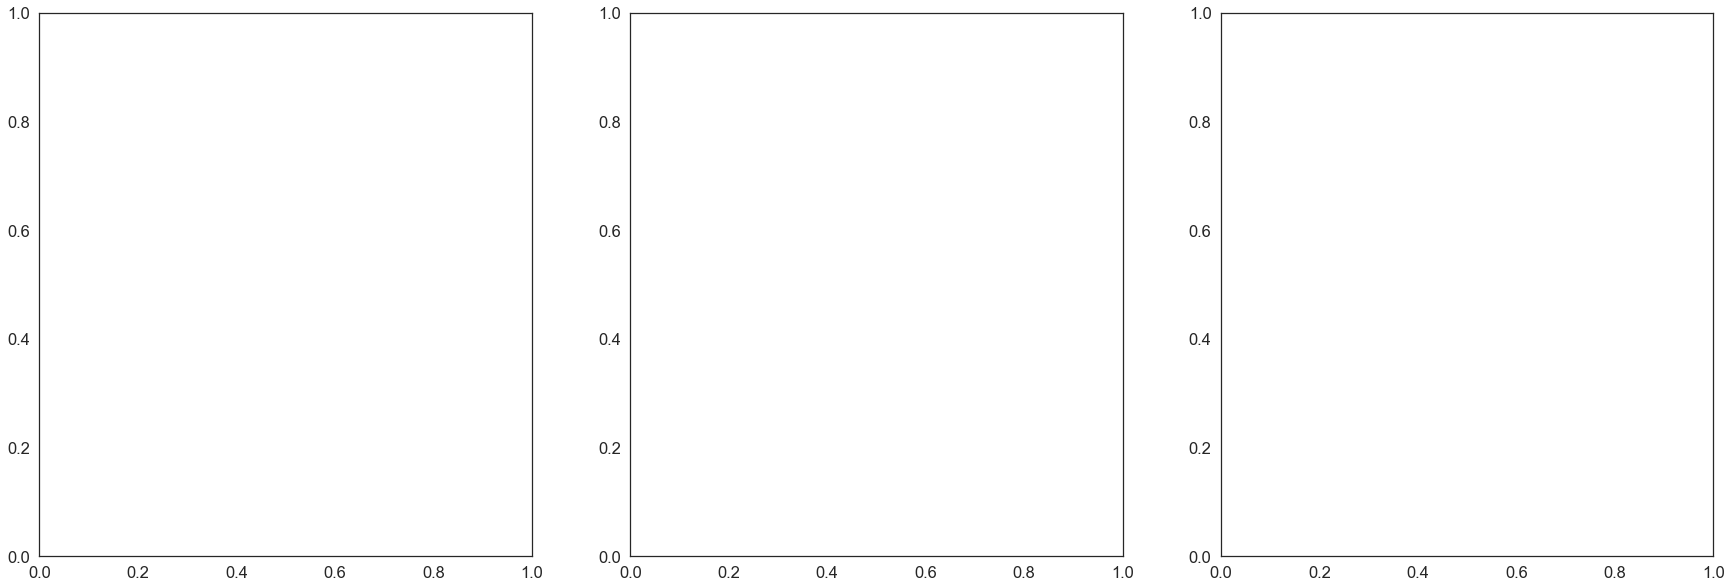

In [96]:
f, ax = plt.subplots(1,3, figsize=(30,10)) 

ax[0].errorbar(x=one_step_ept['break_point_mev'], y=one_step_ept['distance_au'], xerr=one_step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
ax[0].errorbar(x=one_step_ept_c['break_point_mev'], y=one_step_ept_c['distance_au'], xerr=one_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')

#ax[0].errorbar(df_zero_err_one.break_point_mev, df_zero_err_one.gamma1, xerr=df_zero_err_one['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[0].set_xlabel('Break energy [MeV]', size=15)
ax[0].set_ylabel('Distance [AU]', size=15)
ax[0].set_title('One min av'+'\n'+'Events:  '+ n1_step_ept_het)
ax[0].grid()

ax[1].errorbar(x=two_step_ept['break_point_mev'], y=two_step_ept['distance_au'],  xerr=two_step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
ax[1].errorbar(x=two_step_ept_c['break_point_mev'], y=two_step_ept_c['distance_au'],  xerr=two_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')

#ax[1].errorbar(df_zero_err_two.break_point_mev, df_zero_err_two.gamma1, xerr=df_zero_err_two['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[1].set_xlabel('Break energy [MeV]', size=15)
ax[1].set_ylabel('Distance [AU]', size=15)
ax[1].set_title('Two min av'+'\n'+'Events:  '+ n2_step_ept_het)
ax[1].grid()

ax[2].errorbar(x=five_step_ept['break_point_mev'], y=five_step_ept['distance_au'],  xerr=five_step_ept['break_point_err_mev'], color='red', fmt='o', markersize=5, ecolor='red', zorder=0, alpha=0.9)#, label='Flux average')
ax[2].errorbar(x=five_step_ept_c['break_point_mev'], y=five_step_ept_c['distance_au'],  xerr=five_step_ept_c['break_point_err_mev'], color='blue', fmt='o', markersize=5, ecolor='blue', zorder=0, alpha=0.9)#, label='Flux average')

#ax[2].errorbar(df_zero_err_five.break_point_mev, df_zero_err_five.gamma1, xerr=df_zero_err_five['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
ax[2].set_xlabel('Break energy [MeV]', size=15)
ax[2].set_ylabel('Distance [AU]', size=15)
ax[2].set_title('Five min av'+'\n'+'Events:  '+ n5_step_ept_het)
ax[2].grid()

plt.tick_params(axis='x', which='minor', labelsize=15)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)


#ax.set_ylim(-20,0)
#plt.title('Events:  '+ number+'  Zero err: '+ zero)
plt.show()
